# Optimal Subplot Partition

This is a simpe but useful way to create subplots with matplotlib for the case that the number of subplots is not known to the programmer.
This solution supposes that there is an upper bound for the number of subplots, which is chosen as 16 in the example below.
Since the definition of an optimal layout depends on the specific problem and on personal taste, the following code aims to give an inspiration – not the “non-plus-ultra” solution.

To use the optimal subplot partition in your code, just copy the definition of the list `subplot_layout` (below) into your code and optionally modify it as needed.
I will be very happy if you put a link to this GitHub-repository (optional).

If you need an optimal subplot partition for an arbitrary, unbounded number of plots, check out Rob Campbell's _numSubplots – neatly arrange subplots_ (2020) on the MATLAB Central File Exchange: https://www.mathworks.com/matlabcentral/fileexchange/26310-numsubplots-neatly-arrange-subplots (retrieved on 20 January, 2020). 

_by Markus Reinert, 2020-01-20_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define the optimal subplot layout

… for every number of subplots up to an upper bound.
Every element of the list `subplot_layout` is a dictionary with the keys `ncols`, `nrows`, and optionally `figsize`.
This way, the optimal layout for `n` subplots can be retrieved with `subplot_layout[n]` and a corresponding figure can be created with `plt.subplots(**subplot_layout[n])`, see the examples below.

In [2]:
subplot_layout = [
    {"ncols": 0, "nrows": 0, "figsize": (0, 0)},  # 0
    {"ncols": 1, "nrows": 1, "figsize": (6, 6)},  # 1
    {"ncols": 2, "nrows": 1, "figsize": (12, 6)},  # 2
    {"ncols": 3, "nrows": 1, "figsize": (15, 5)},  # 3
    {"ncols": 2, "nrows": 2, "figsize": (12, 12)},  # 4
    {"ncols": 3, "nrows": 2, "figsize": (12, 8)},  # 5
    {"ncols": 3, "nrows": 2, "figsize": (12, 8)},  # 6
    {"ncols": 4, "nrows": 2, "figsize": (16, 8)},  # 7
    {"ncols": 4, "nrows": 2, "figsize": (16, 8)},  # 8
    {"ncols": 3, "nrows": 3, "figsize": (15, 15)},  # 9
    {"ncols": 2, "nrows": 5, "figsize": (10, 15)},  # 10
    {"ncols": 4, "nrows": 3, "figsize": (15, 10)},  # 11
    {"ncols": 4, "nrows": 3, "figsize": (15, 10)},  # 12
    {"ncols": 5, "nrows": 3, "figsize": (15, 10)},  # 13
    {"ncols": 5, "nrows": 3, "figsize": (15, 10)},  # 14
    {"ncols": 5, "nrows": 3, "figsize": (15, 10)},  # 15
    {"ncols": 4, "nrows": 4, "figsize": (16, 16)},  # 16
]

## Test a configuration

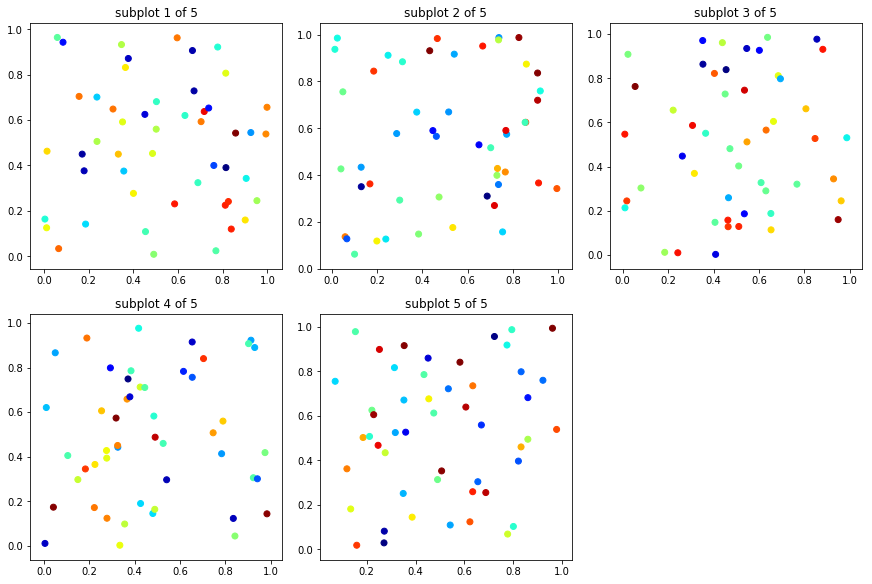

In [3]:
# Choose a number of subplots to test
n = 5

# Create the figure
fig, axs = plt.subplots(**subplot_layout[n], constrained_layout=True, squeeze=False)
for i, ax in enumerate(axs.flatten()):
    # Remove additional axes
    if i >= n:
        fig.delaxes(ax)
        continue
    # Name and fill every axis with random data
    ax.set_title(f"subplot {i+1} of {n}")
    ax.scatter(np.random.random(10*n), np.random.random(10*n), c=np.random.random(10*n), cmap="jet")

## Test all configurations

<Figure size 0x0 with 0 Axes>

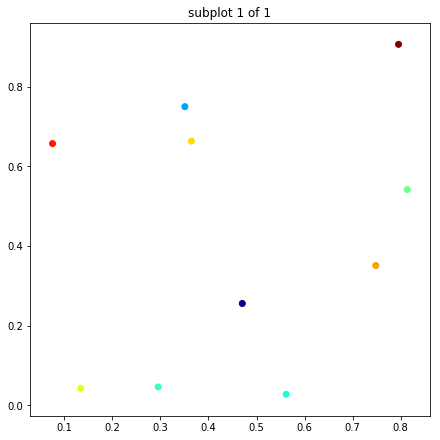

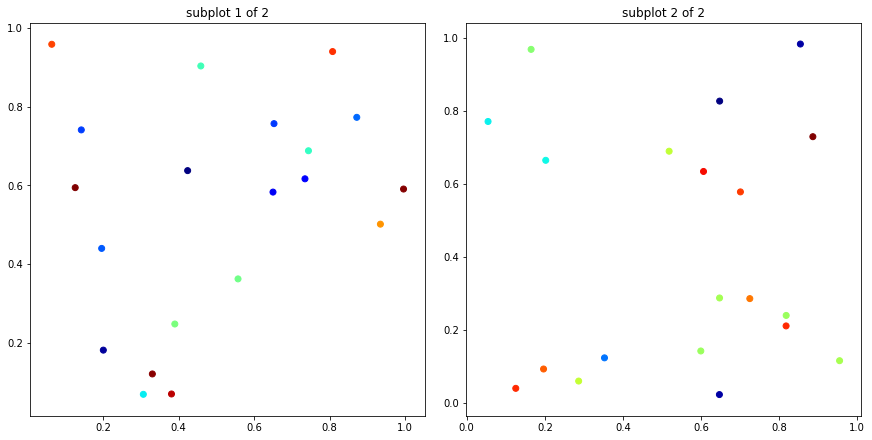

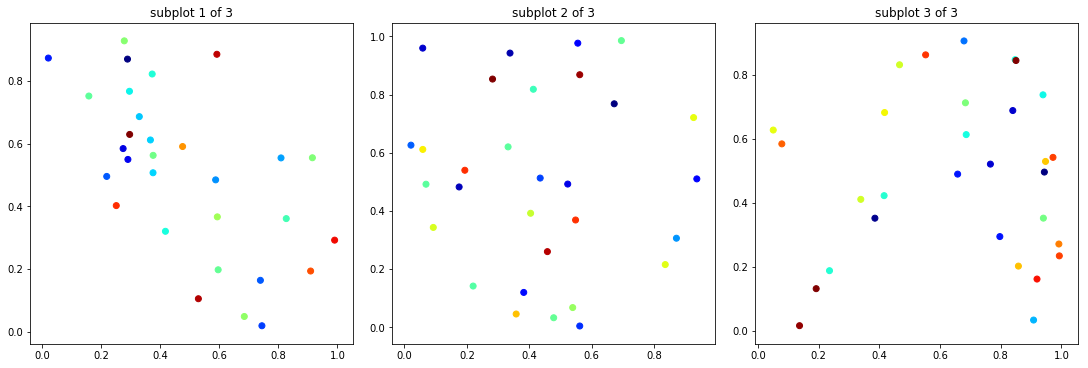

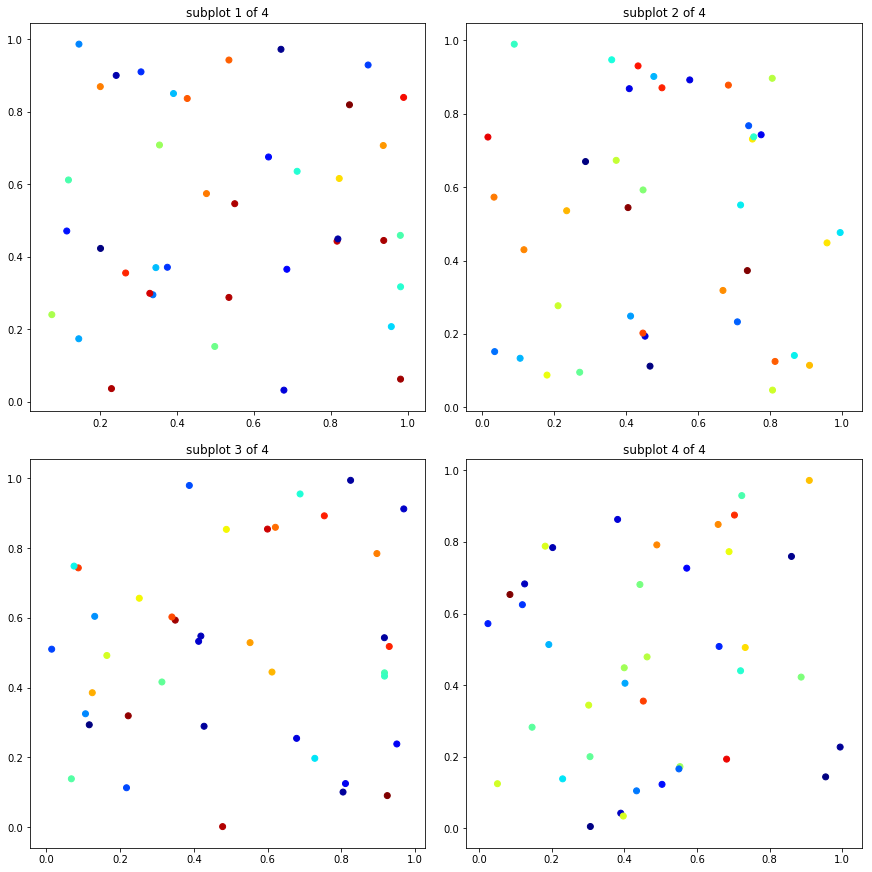

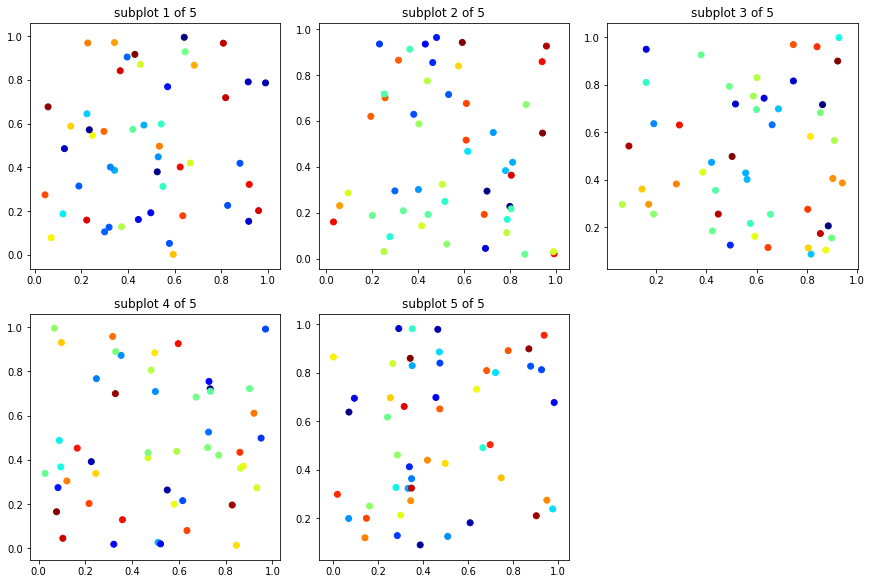

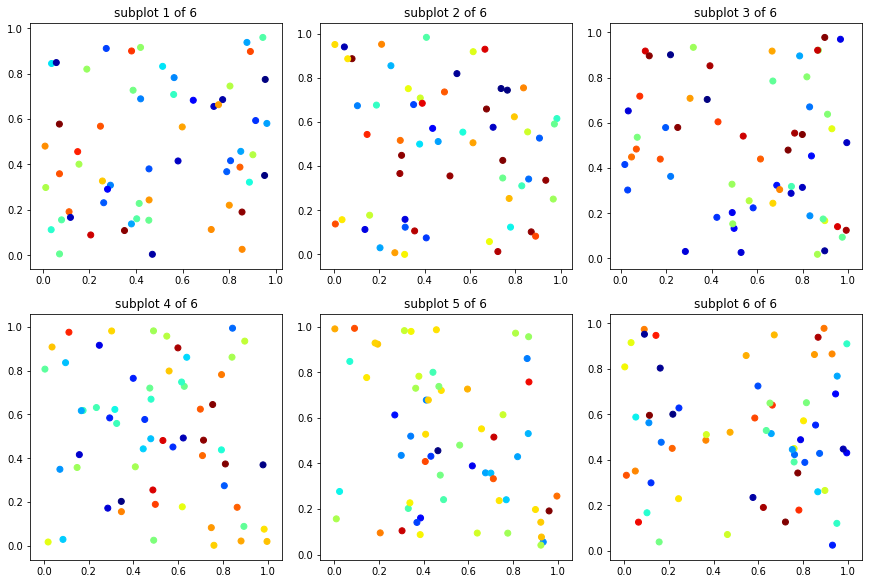

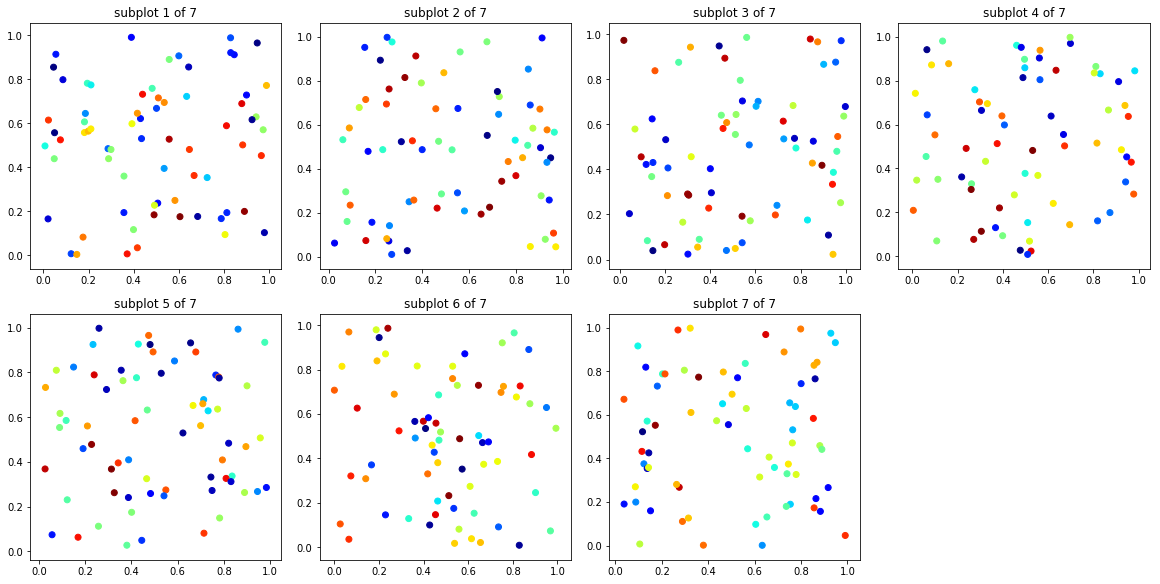

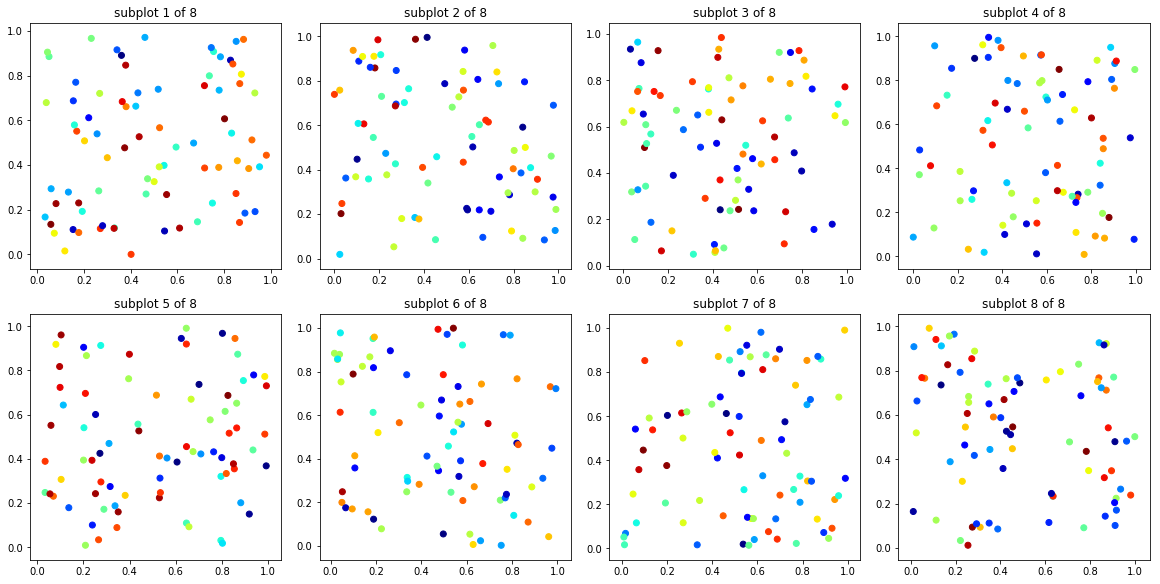

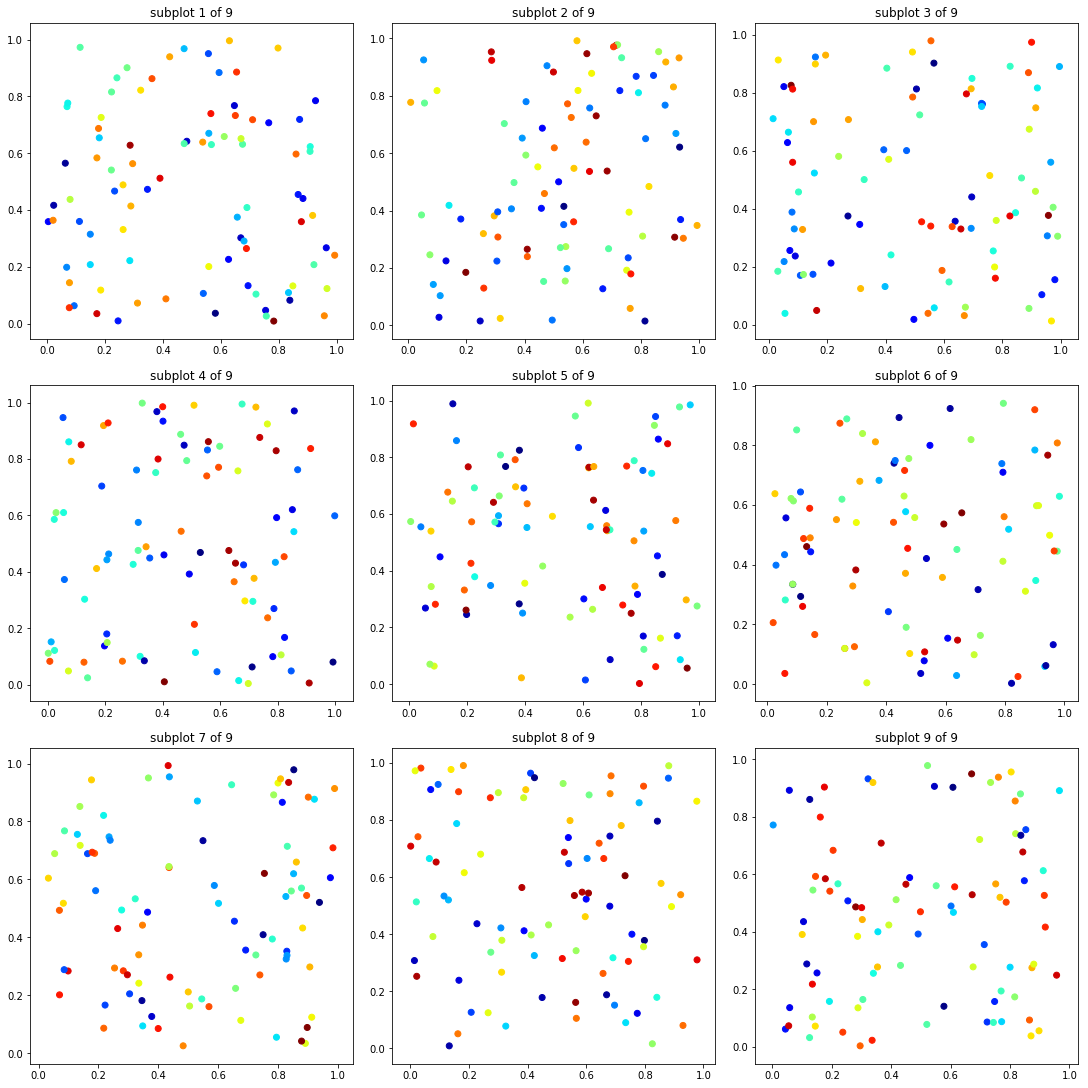

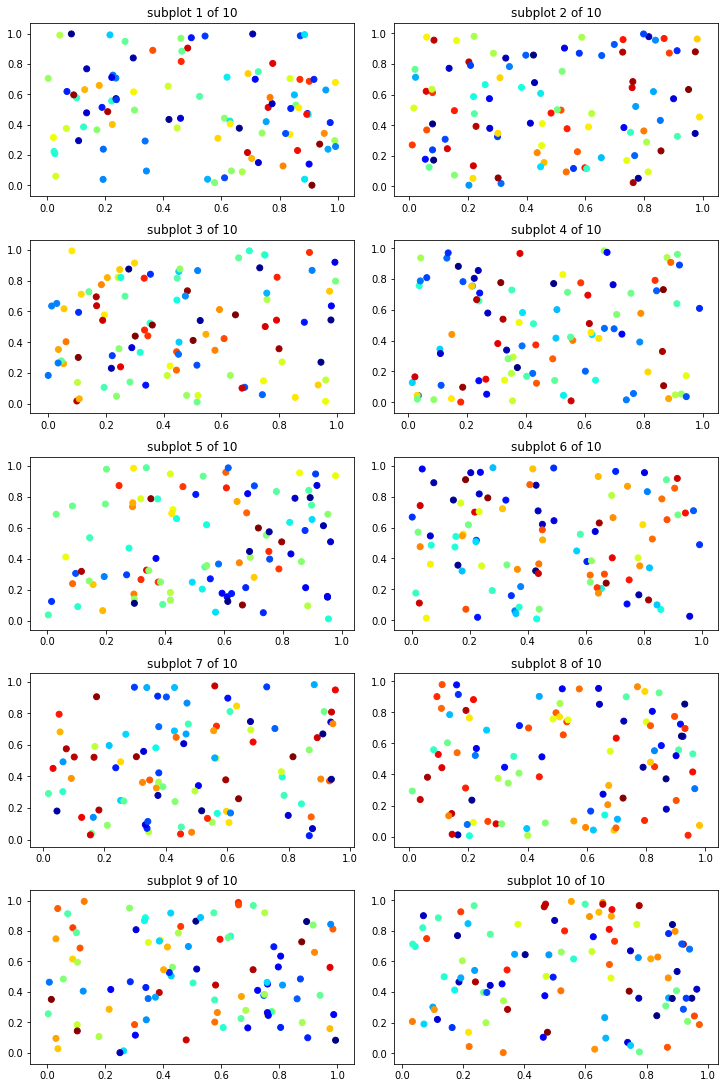

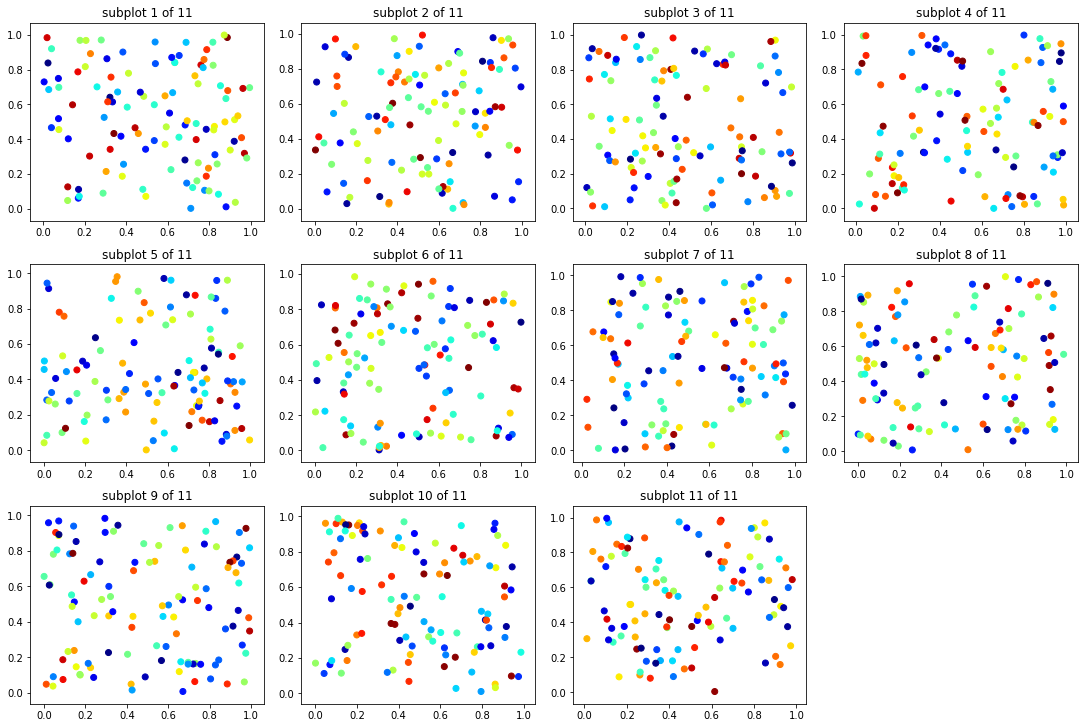

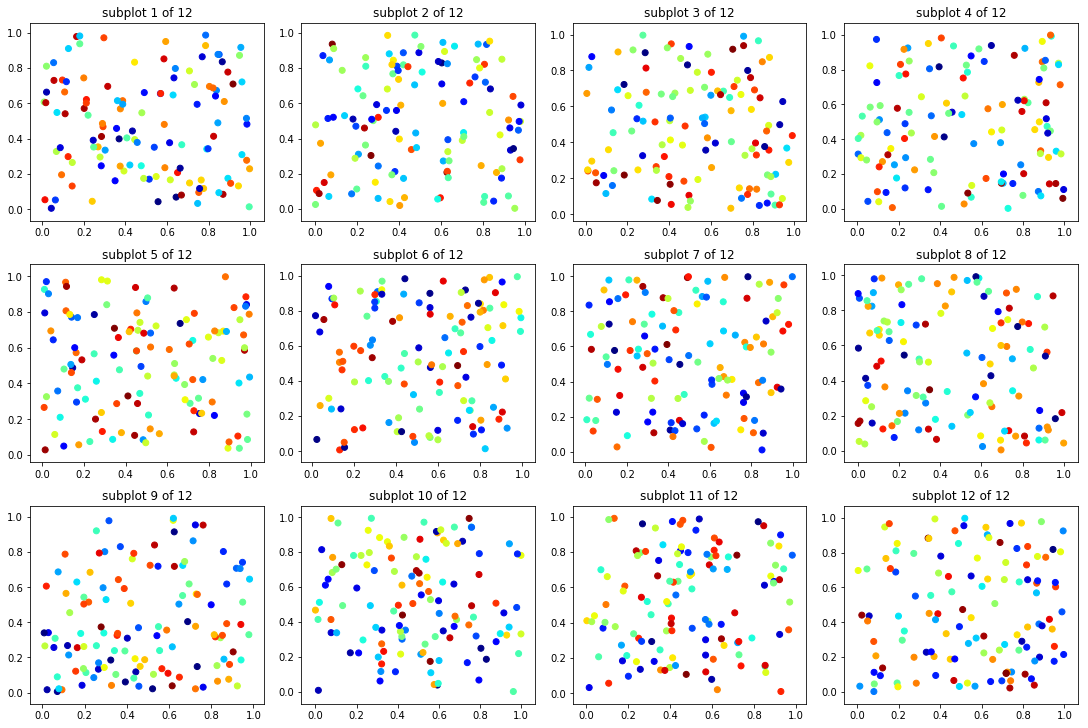

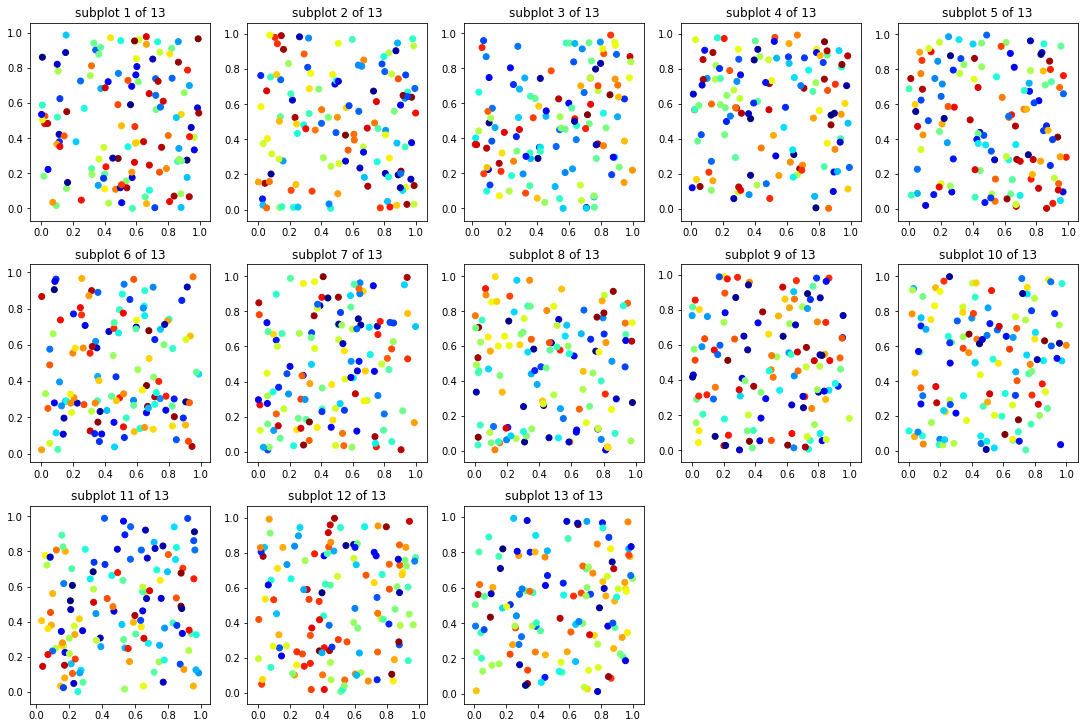

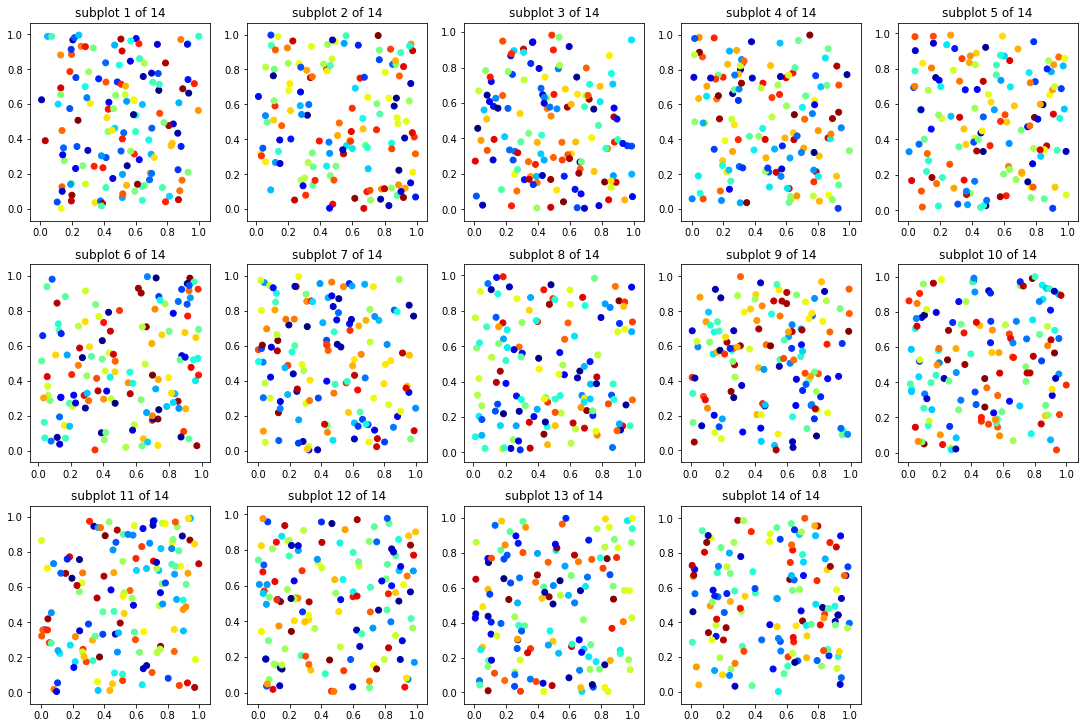

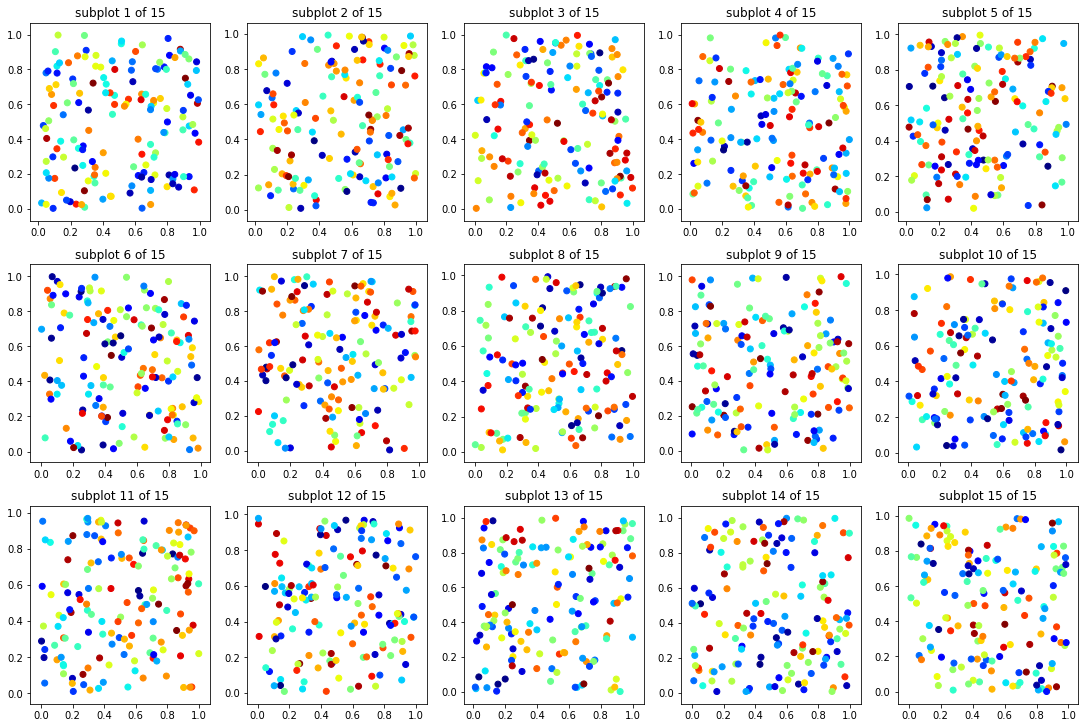

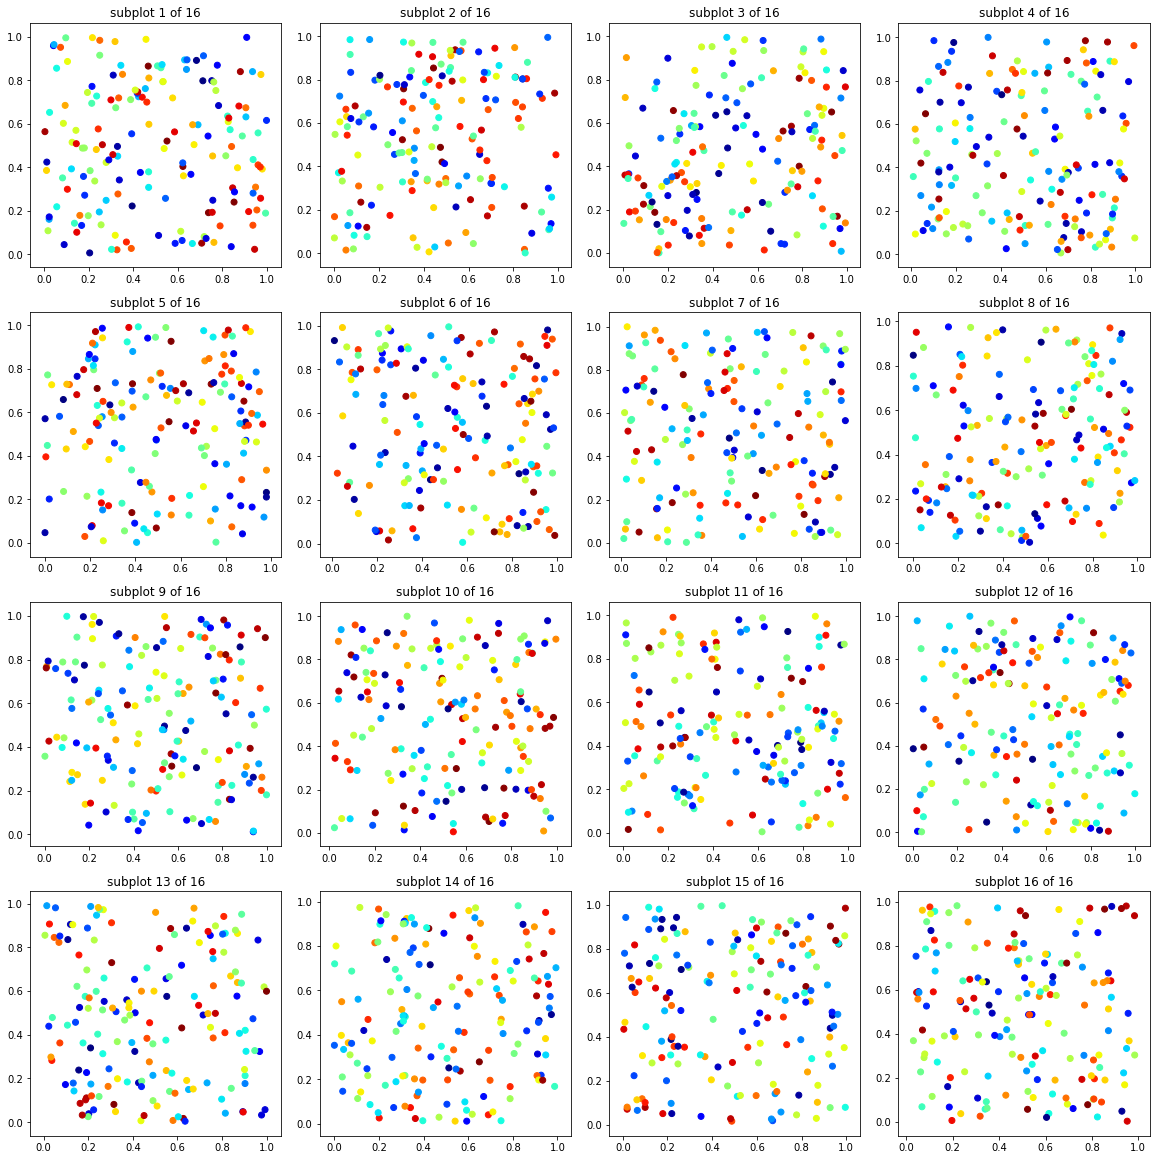

In [4]:
for n in range(len(subplot_layout)):
    # Use the following line to scale all figures to half size (do only once):
    # subplot_layout[n]["figsize"] = [x/2 for x in subplot_layout[n]["figsize"]]
    fig, axs = plt.subplots(**subplot_layout[n], constrained_layout=True, squeeze=False)
    for i, ax in enumerate(axs.flatten()):
        if i >= n:
            fig.delaxes(ax)
            continue
        ax.set_title(f"subplot {i+1} of {n}")
        ax.scatter(np.random.random(10*n), np.random.random(10*n), c=np.random.random(10*n), cmap="jet")